# Exploring Disney Land Wait Time Data Set 

In [98]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"

import sklearn.decomposition as skld

import matplotlib.pyplot as plt
import seaborn as sns

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

In [99]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[(splash.SPOSTMIN > 0) | (splash.SACTMIN > 0)]

splash.head() #has posted minutes for each ride

,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN
2,01/01/2012,2012-01-01 10:32:00,NaN,13.0
3,01/01/2012,2012-01-01 12:02:00,30.0,NaN
4,01/01/2012,2012-01-01 12:04:00,NaN,23.0


# Splash Mountain Analysis

In [100]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)


In [101]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 10:32:00,0.0,13.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:04:00,0.0,23.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [102]:
#avg of posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])
sum_by_day.head(n = 6)


,date,SPOSTMIN
0,2012-01-01,31.923077
1,2012-01-02,43.750000
2,2012-01-03,5.000000
3,2012-01-04,15.000000
4,2012-01-05,33.437500
5,2012-01-06,33.235294


In [103]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_splash2.head(n = 3)


,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,31.923077,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
1,2012-01-02,43.750000,NaN,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
2,2012-01-03,5.000000,NaN,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN


In [7]:
#fill na for new meta splash data
meta_splash2 = meta_splash2.fillna(0)

#### Wait time by Week 

[Text(0, 0.5, 'Average Attendance by Minute'),
 Text(0.5, 0, 'Week of the Year')]

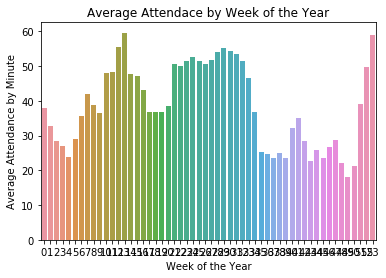

In [8]:
week_avg = meta_splash2.groupby("WEEKOFYEAR")["SPOSTMIN"].mean()
week_avg = week_avg.reset_index()
week_avg = pd.DataFrame(week_avg,columns=['WEEKOFYEAR','SPOSTMIN'])
ax = sns.barplot(x = "WEEKOFYEAR", y = "SPOSTMIN", data = week_avg)
ax.set_title("Average Attendace by Week of the Year")
ax.set(xlabel='Week of the Year', ylabel='Average Attendance by Minute')

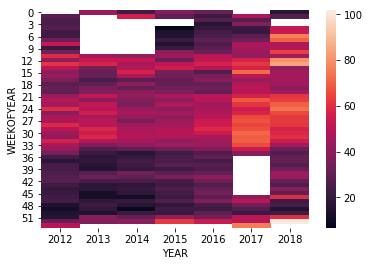

In [9]:
# Grouping by week and year

#aggregate by month
week_splash2 = meta_splash2.groupby(['WEEKOFYEAR', 'YEAR'])['SPOSTMIN'].mean().reset_index()

week_splash2 = week_splash2.pivot("WEEKOFYEAR", "YEAR", "SPOSTMIN").iloc[:,0:7]
ax = sns.heatmap(week_splash2)

#### Temperature vs Wait Time

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

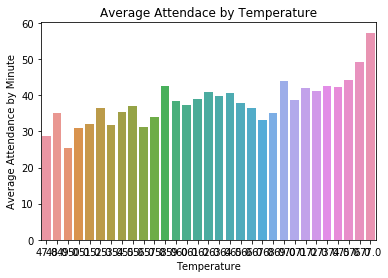

In [10]:
meta_splash2.WDWMINTEMP_mean = meta_splash2.WDWMINTEMP_mean.round()
avg_temp = meta_splash2.groupby("WDWMINTEMP_mean")["SPOSTMIN"].mean()
avg_temp = avg_temp.reset_index()
avg_temp = pd.DataFrame(avg_temp,columns=['WDWMINTEMP_mean','SPOSTMIN'])


ax = sns.barplot(x = "WDWMINTEMP_mean", y = "SPOSTMIN", data = avg_temp)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')

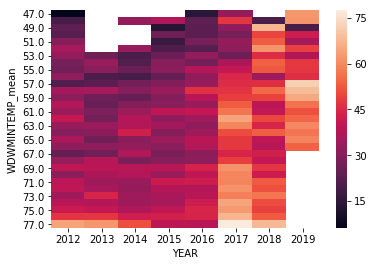

In [11]:
# Grouping by temperature and year

#aggregate by month
temp_splash2 = meta_splash2.groupby(['WDWMINTEMP_mean', 'YEAR'])['SPOSTMIN'].mean().reset_index()

temp_splash2 = temp_splash2.pivot("WDWMINTEMP_mean", "YEAR", "SPOSTMIN")
temp_splash2
ax = sns.heatmap(temp_splash2)

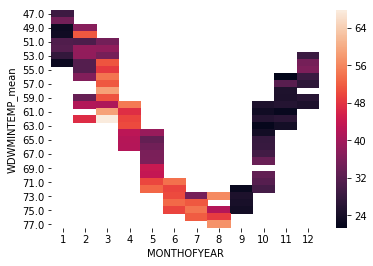

In [12]:
# Grouping by temperature and month

#aggregate by month
temp_splash2 = meta_splash2.groupby(['WDWMINTEMP_mean', 'MONTHOFYEAR'])['SPOSTMIN'].mean().reset_index()

temp_splash2 = temp_splash2.pivot("WDWMINTEMP_mean", "MONTHOFYEAR", "SPOSTMIN")
temp_splash2
ax = sns.heatmap(temp_splash2)

#### Park Hour vs Wait Time 

In [13]:
park_hour_df = meta_splash2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 14.91666667]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 23.98333333]
park_hour_df.MKHOURS = park_hour_df.MKHOURS.round()
park_hour_df.MKHOURS.unique()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


array([16., 15., 14., 13., 11., 12., 17., 10., 18., 24.,  9.,  8.])

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Park Hour')]

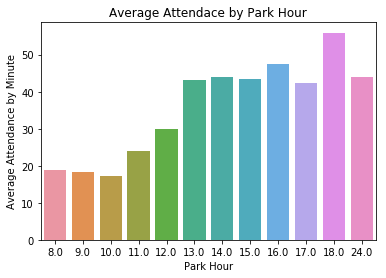

In [14]:
park_hour_df = meta_splash2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 14.91666667]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 23.98333333]
park_hour_df.MKHOURS = park_hour_df.MKHOURS.round()
park_hour_df.MKHOURS.unique()

park_hour_df = park_hour_df.groupby("MKHOURS")["SPOSTMIN"].mean()
park_hour_df = park_hour_df.reset_index()
park_hour_df.head(n=3)
#park_hour_df = pd.DataFrame(avg_temp,columns=['MKHOURS','SPOSTMIN','SEASON'])


ax = sns.barplot(x = "MKHOURS", y = "SPOSTMIN", data = park_hour_df)
ax.set_title("Average Attendace by Park Hour")
ax.set(xlabel='Park Hour', ylabel='Average Attendance by Minute')

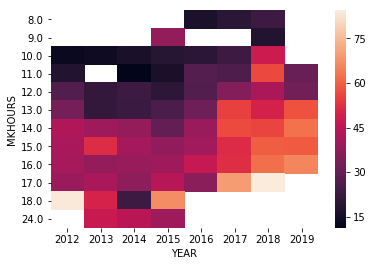

In [15]:
meta_splash3 = meta_splash2
meta_splash3.MKHOURS = meta_splash3.MKHOURS.round()
park_h_splash2 = meta_splash3.groupby(['MKHOURS', 'YEAR'])['SPOSTMIN'].mean().reset_index()

park_h_splash2 = park_h_splash2.pivot("MKHOURS", "YEAR", "SPOSTMIN")
ax = sns.heatmap(park_h_splash2)

#### Time Series 

In [16]:
avg = meta_splash2
avg.head(n=3)

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0


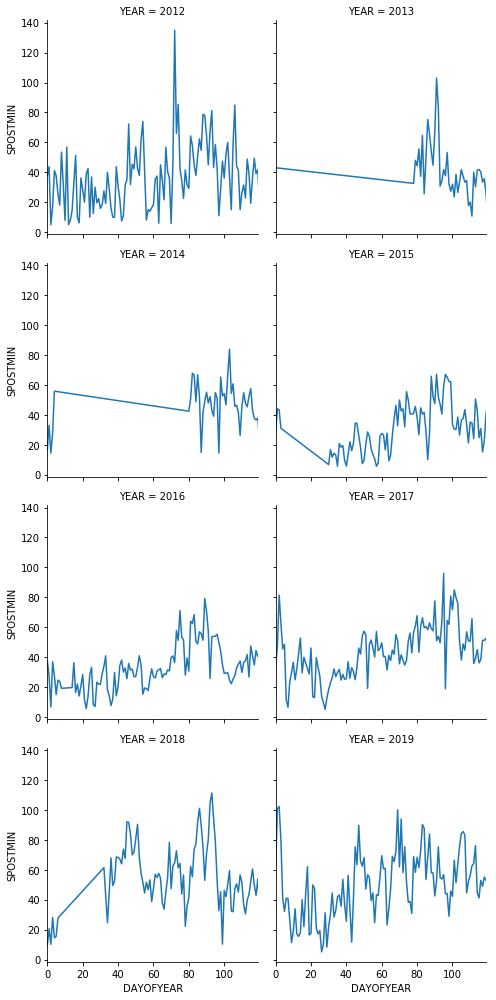

In [17]:
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

ax = sns.FacetGrid(avg, col="YEAR",col_wrap=2, height=3.5)
ax = ax.map_dataframe(dateplot, "DAYOFYEAR", "SPOSTMIN")

# Random Forest 

Analyzing all

### Reducing Variables

In [18]:
# Select July Only
#july = meta_splash2[meta_splash2['MONTHOFYEAR'] == 7]

# How many Holidays in July?
#july['HOLIDAYN'].drop_duplicates()

## Finding Strongly Correlated Variables in July
splash_corr = meta_splash2.corr()['SPOSTMIN'][:-2] # -1 because the latest row is spostmin
golden_features_list = splash_corr[abs(splash_corr) > 0.20].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list), golden_features_list))

There is 42 strongly correlated values with SPOSTMIN:
SPOSTMIN              1.000000
AKHOURSYEST           0.532307
AKHOURS               0.531074
AKHOURSEMH            0.530836
AKHOURSTOM            0.526427
AKHOURSEMHYEST        0.520594
AKHOURSEMHTOM         0.506027
MKHOURS               0.419598
MKHOURSEMH            0.403368
HSHOURS               0.375347
HSHOURSTOM            0.364362
HSHOURSYEST           0.356237
WDWMAXTEMP            0.334935
EP09CAPACITY          0.323179
HSFIREWK              0.301307
YEAR                  0.297048
WDWMEANTEMP           0.284476
HSHOURSEMHYEST        0.278263
WEATHER_WDWPRECIP     0.271109
HSHOURSEMHTOM         0.270584
HSHOURSEMH            0.270417
AKEMHETOM             0.266406
AKEMHEVE              0.262796
AKEMHEYEST            0.260835
CapacityLost_HS       0.253429
CapacityLostWGT_HS    0.250829
WEATHER_WDWHIGH       0.250729
WDWMINTEMP            0.228848
CapacityLost_EP       0.219181
MKHOURSTOM            0.215867
HS20CAPACITY    

### Training and Testing Set 

In [19]:
from sklearn.model_selection import train_test_split

golden_list = golden_features_list.to_frame()
golden_list = golden_list.reset_index()
golden_list# = pd.DataFrame(golden_list,columns=['VARIABLES','SPOSTMIN'])
golden_list = golden_list.iloc[:,0]
golden_list = golden_list.tolist()
golden_list.remove('SPOSTMIN')

In [20]:
x = meta_splash2[golden_list]
y = meta_splash2['SPOSTMIN']

#75% training & 25% testing
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.25)

y_train = np.log(y_train)
y_test = np.log(y_test)

### Train Model 

In [21]:
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 100)

#train the model using the traing set
dt = rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

### Evaluating Algorithm 

In [22]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.23166916280691427
Mean Squared Error: 0.10583394667452174
Root Mean Squared Error: 0.32532129760364864


As n_estimator get to 90, the MSE decrease. But as it past 100, the MSE increases

### Check Accuracy

In [23]:
predictions = rf.predict(x_test)

#Calculate the absolute errors
errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.23 degrees.


In [24]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.64 %.


# Compare Prediction to Actual Wait Time Summer 2018

In [25]:
meta_splash2.SEASON.unique()

array(['CHRISTMAS PEAK', 'CHRISTMAS', 'WINTER',
       'MARTIN LUTHER KING JUNIOR DAY', 'PRESIDENTS WEEK', 'SPRING',
       'EASTER', 'MEMORIAL DAY', 'SUMMER BREAK', 'JULY 4TH',
       'SEPTEMBER LOW', 'FALL', 'COLUMBUS DAY', 'HALLOWEEN',
       'JERSEY WEEK', 'THANKSGIVING', 'MARDI GRAS'], dtype=object)

In [40]:
summer_df = meta_splash2[(meta_splash2.MONTHOFYEAR == 5) | (meta_splash2.MONTHOFYEAR == 6)|
                        (meta_splash2.MONTHOFYEAR == 7)|(meta_splash2.MONTHOFYEAR == 8)|
                        (meta_splash2.MONTHOFYEAR == 9)]
summer2018_df = summer_df[summer_df.YEAR == 2018]
summer2018_df
actual_time = summer2018_df.iloc[:,0:2]
actual_time.index = range(153)
summer2018_dates = summer2018_df.iloc[:,0:1]

In [41]:
#Test rf on summer 2018
predict_time_df = summer2018_df[golden_list]
predict_time_df

#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 100)

#train the model using the traing set
rf.fit(x_train,y_train)

predicted_time = rf.predict(predict_time_df)

In [42]:
predicted_time_df = pd.DataFrame(predicted_time)
predicted_time_df.head(n = 6)

comparison_df = pd.concat([actual_time,predicted_time_df],
                              axis = 1)
comparison_df = comparison_df.rename({'date':'Date',
                                     'SPOSTMIN':'Actual_Time',
                                     0:'Predicted_Time'}, axis = 1)
comparison_df.Predicted_Time = np.exp(comparison_df.Predicted_Time)
comparison_df.head(n = 10)

,Date,Actual_Time,Predicted_Time
0,2018-05-01,37.875000,41.531376
1,2018-05-02,45.781250,45.868511
2,2018-05-03,38.911290,40.011163
3,2018-05-04,60.344828,49.877831
4,2018-05-05,38.885135,44.222213
5,2018-05-06,30.538462,35.330781
6,2018-05-07,72.830189,61.593085
7,2018-05-08,52.552083,39.579454
8,2018-05-09,18.000000,25.954445
9,2018-05-10,41.666667,41.422391


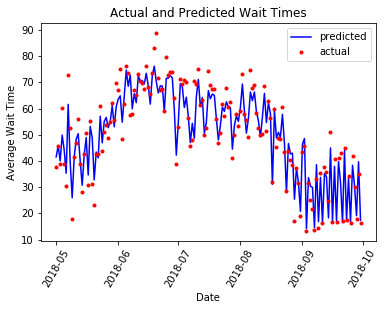

In [43]:
#ax = sns.lineplot(comparison_df.Date,comparison_df.Actual_Time)
#ax = sns.scatterplot(comparison_df.Date,comparison_df.Predicted_Time,palette)

plt.plot(comparison_df.Date, comparison_df.Predicted_Time,'b-', label = 'predicted')

plt.plot(comparison_df.Date, comparison_df.Actual_Time,'ro', label = 'actual',
        markersize = 3)

plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Average Wait Time'); plt.title('Actual and Predicted Wait Times');


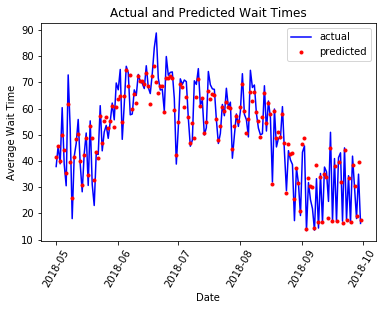

In [44]:
plt.plot(comparison_df.Date, comparison_df.Actual_Time,'b-', label = 'actual')

plt.plot(comparison_df.Date, comparison_df.Predicted_Time,'ro', label = 'predicted',
        markersize = 3)

plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Average Wait Time'); plt.title('Actual and Predicted Wait Times');


# Compare Prediction to Actual Wait Time July 2018

In [45]:
july_df = meta_splash2[meta_splash2.MONTHOFYEAR == 7]
july2018_df = july_df[july_df.YEAR == 2018]
july2018_df
actual_time = july2018_df.iloc[:,0:2]
actual_time.index = range(31)

In [46]:
#Test rf on july 2018
predict_time_df = july2018_df[golden_list]
predict_time_df

#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 100)

#train the model using the traing set
rf.fit(x_train,y_train)

predicted_time = rf.predict(predict_time_df)

In [47]:
predicted_time_df = pd.DataFrame(predicted_time)
predicted_time_df.head(n = 6)

comparison_df = pd.concat([actual_time,predicted_time_df],
                              axis = 1)
comparison_df = comparison_df.rename({'date':'Date',
                                     'SPOSTMIN':'Actual_Time',
                                     0:'Predicted_Time'}, axis = 1)

comparison_df.Predicted_Time = np.exp(comparison_df.Predicted_Time)

comparison_df.head(n = 10)

,Date,Actual_Time,Predicted_Time
0,2018-07-01,52.796610,54.784255
1,2018-07-02,71.344086,66.486175
2,2018-07-03,69.210526,67.655746
3,2018-07-04,70.887097,60.636659
4,2018-07-05,70.275591,64.119222
5,2018-07-06,56.296296,57.462898
6,2018-07-07,45.625000,47.212583
7,2018-07-08,47.892157,54.404487
8,2018-07-09,70.595238,50.078987
9,2018-07-10,69.205607,63.024378


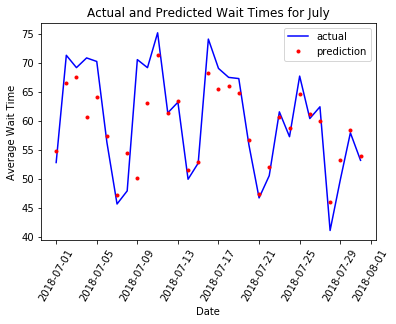

In [48]:
plt.plot(comparison_df.Date, comparison_df.Actual_Time,'b-', label = 'actual')

plt.plot(comparison_df.Date, comparison_df.Predicted_Time,'ro', label = 'prediction',
        markersize = 3)

plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Average Wait Time'); plt.title('Actual and Predicted Wait Times for July');


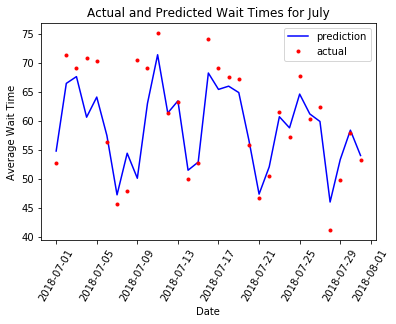

In [49]:
plt.plot(comparison_df.Date, comparison_df.Predicted_Time,'b-', label = 'prediction')

plt.plot(comparison_df.Date, comparison_df.Actual_Time,'ro', label = 'actual',
        markersize = 3)

plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Average Wait Time'); plt.title('Actual and Predicted Wait Times for July');

# Visualzing Tree 

In [86]:

act_disney = meta_splash[np.isnan(meta_splash.SACTMIN) != True]
act_disney

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
5,2012-01-01,2012-01-01 12:47:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
6,2012-01-01,2012-01-01 14:01:00,65.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
7,2012-01-01,2012-01-01 14:57:00,95.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
8,2012-01-01,2012-01-01 15:49:00,60.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
9,2012-01-01,2012-01-02 01:41:00,10.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [89]:
#aggregate by year
year_splash = meta_splash2.groupby(['YEAR'])['SPOSTMIN','SACTMIN'].mean()
year_splash = year_splash.reset_index()
year_splash.head()

KeyError: "Columns not found: 'SACTMIN'"

In [ ]:
ax = sns.lineplot(x = 'date', y = "SPOSTMIN", data = meta_splash2)